In [8]:
# First, upload both files
from google.colab import files
import pandas as pd
import numpy as np

print("📤 Upload tmdb_5000_movies.csv first...")
uploaded_movies = files.upload()

print("\n📤 Now upload tmdb_5000_credits.csv...")
uploaded_credits = files.upload()

# Get file names
movies_file = list(uploaded_movies.keys())[0]
credits_file = list(uploaded_credits.keys())[0]

print(f"\n✅ Files uploaded: {movies_file}, {credits_file}")

📤 Upload tmdb_5000_movies.csv first...


Saving tmdb_5000_movies.csv to tmdb_5000_movies.csv

📤 Now upload tmdb_5000_credits.csv...


Saving tmdb_5000_credits.csv to tmdb_5000_credits.csv

✅ Files uploaded: tmdb_5000_movies.csv, tmdb_5000_credits.csv


In [12]:
# COMPLETE MERGE CODE - Copy and paste this entire block

import pandas as pd
import numpy as np

# Load datasets
movies = pd.read_csv('tmdb_5000_movies.csv')
credits = pd.read_csv('tmdb_5000_credits.csv')

# Rename for consistency
if 'movie_id' in credits.columns:
    credits = credits.rename(columns={'movie_id': 'id'})

# Merge
movies_merged = pd.merge(movies, credits, on='id', how='left')

# Data cleaning
movies_merged['vote_average'] = movies_merged['vote_average'].fillna(movies_merged['vote_average'].median())
movies_merged['vote_count'] = movies_merged['vote_count'].fillna(0)
movies_merged['release_date'] = pd.to_datetime(movies_merged['release_date'], errors='coerce')
movies_merged['release_year'] = movies_merged['release_date'].dt.year

# Add decade
movies_merged['decade'] = (movies_merged['release_year'] // 10 * 10).astype('Int64')

print(f"✅ MERGED: {movies_merged.shape[0]} movies, {movies_merged.shape[1]} columns")
print(f"📊 Rating stats - Mean: {movies_merged['vote_average'].mean():.2f}, Median: {movies_merged['vote_average'].median():.2f}")

# Save
movies_merged.to_csv('tmdb_merged_analysis.csv', index=False)
print("💾 Saved as 'tmdb_merged_analysis.csv'")

✅ MERGED: 4803 movies, 25 columns
📊 Rating stats - Mean: 6.09, Median: 6.20
💾 Saved as 'tmdb_merged_analysis.csv'


In [13]:
# ===========================================
# CELL 1: MOVIE RATINGS ANALYSIS - TASK 2
# Hex Softwares Data Science Internship
# ===========================================

print("🎬 MOVIE RATINGS ANALYSIS PROJECT")
print("="*60)
print("Organization: Hex Softwares Pvt. Ltd.")
print("Domain: Data Science")
print("Task: Analyzing and Visualizing Movie Ratings")
print("="*60)

# Install required libraries
print("\n📦 INSTALLING REQUIRED PACKAGES...")
!pip install -q pandas numpy matplotlib seaborn plotly missingno wordcloud scikit-learn
!pip install -q streamlit pyngrok  # For dashboard (optional)

print("✅ All packages installed successfully!")

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set visual style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
print("\n📊 Libraries imported and configured")

🎬 MOVIE RATINGS ANALYSIS PROJECT
Organization: Hex Softwares Pvt. Ltd.
Domain: Data Science
Task: Analyzing and Visualizing Movie Ratings

📦 INSTALLING REQUIRED PACKAGES...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 58.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 103.5 MB/s eta 0:00:00
✅ All packages installed successfully!

📊 Libraries imported and configured


In [20]:
# ===========================================
# CELL 2: LOAD AND VERIFY DATA
# ===========================================

print("📂 LOADING MERGED DATASET...")
print("="*50)

# Load the merged dataset
movies_df = pd.read_csv('tmdb_merged_analysis.csv')

print(f"✅ Dataset loaded successfully!")
print(f"Shape: {movies_df.shape[0]} rows × {movies_df.shape[1]} columns")

# FIX: Check and rename title columns
print("\n🔄 STANDARDIZING COLUMN NAMES...")

# Check what columns we have
print("Checking for title columns...")
title_columns = [col for col in movies_df.columns if 'title' in col.lower()]
print(f"Found title columns: {title_columns}")

# Standardize to 'title' column
if 'title_x' in movies_df.columns and 'title_y' in movies_df.columns:
    movies_df = movies_df.rename(columns={'title_x': 'title'})
    movies_df = movies_df.drop(columns=['title_y'])
    print("✅ Renamed 'title_x' → 'title', dropped 'title_y'")
elif 'title_x' in movies_df.columns:
    movies_df = movies_df.rename(columns={'title_x': 'title'})
    print("✅ Renamed 'title_x' → 'title'")
elif 'title_y' in movies_df.columns:
    movies_df = movies_df.rename(columns={'title_y': 'title'})
    print("✅ Renamed 'title_y' → 'title'")
elif 'title' in movies_df.columns:
    print("✅ 'title' column already exists")
else:
    # Use original_title as fallback
    if 'original_title' in movies_df.columns:
        movies_df = movies_df.rename(columns={'original_title': 'title'})
        print("✅ Renamed 'original_title' → 'title' (fallback)")
    else:
        print("⚠️ No title column found!")

print(f"\n📊 DATASET OVERVIEW:")

# Display basic info
print("\n1. COLUMN INFORMATION:")
print(f"Total columns: {len(movies_df.columns)}")
print("First 10 columns:", movies_df.columns[:10].tolist())

print("\n2. FIRST 3 MOVIES:")
# Display available columns
display_cols = []
for col in ['title', 'vote_average', 'vote_count', 'release_year', 'budget']:
    if col in movies_df.columns:
        display_cols.append(col)

if display_cols:
    print(movies_df[display_cols].head(3))
else:
    print(movies_df.iloc[:, :5].head(3))

print("\n3. DATA QUALITY CHECK:")
checks = [
    ('Total movies', len(movies_df)),
    ('Movies with ratings', movies_df['vote_average'].notnull().sum()),
    ('Movies with vote counts', movies_df['vote_count'].notnull().sum()),
]

for check_name, value in checks:
    print(f"• {check_name}: {value}")

if 'release_year' in movies_df.columns:
    print(f"• Time range: {int(movies_df['release_year'].min())} to {int(movies_df['release_year'].max())}")

# Save backup
movies_df.to_csv('movies_analysis_backup.csv', index=False)
print("\n💾 Backup saved as 'movies_analysis_backup.csv'")

📂 LOADING MERGED DATASET...
✅ Dataset loaded successfully!
Shape: 4803 rows × 25 columns

🔄 STANDARDIZING COLUMN NAMES...
Checking for title columns...
Found title columns: ['original_title', 'title_x', 'title_y']
✅ Renamed 'title_x' → 'title', dropped 'title_y'

📊 DATASET OVERVIEW:

1. COLUMN INFORMATION:
Total columns: 24
First 10 columns: ['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language', 'original_title', 'overview', 'popularity', 'production_companies']

2. FIRST 3 MOVIES:
                                      title  vote_average  vote_count  \
0                                    Avatar           7.2       11800   
1  Pirates of the Caribbean: At World's End           6.9        4500   
2                                   Spectre           6.3        4466   

   release_year     budget  
0        2009.0  237000000  
1        2007.0  300000000  
2        2015.0  245000000  

3. DATA QUALITY CHECK:
• Total movies: 4803
• Movies with ratings: 4803
• Movies with 

In [21]:
# ===========================================
# CELL 3: DATA PREPROCESSING & CLEANING
# ===========================================

print("🧹 DATA PREPROCESSING & CLEANING")
print("="*50)

# Ensure required columns exist
print("\n🔍 CHECKING REQUIRED COLUMNS...")

# Fix release_year if missing
if 'release_year' not in movies_df.columns and 'release_date' in movies_df.columns:
    movies_df['release_date'] = pd.to_datetime(movies_df['release_date'], errors='coerce')
    movies_df['release_year'] = movies_df['release_date'].dt.year
    print("✅ Created 'release_year' from 'release_date'")

# Fix decade if missing
if 'decade' not in movies_df.columns and 'release_year' in movies_df.columns:
    movies_df['decade'] = (movies_df['release_year'] // 10 * 10).astype('Int64')
    print("✅ Created 'decade' column")

# 1. Handle missing values
print("\n1. HANDLING MISSING VALUES:")
missing_before = movies_df.isnull().sum().sum()
print(f"Total missing values before cleaning: {missing_before}")

# Fill missing ratings
if 'vote_average' in movies_df.columns:
    median_rating = movies_df['vote_average'].median()
    movies_df['vote_average'] = movies_df['vote_average'].fillna(median_rating)
    print(f"✅ Filled missing ratings with median: {median_rating:.2f}")

# Fill missing vote counts
if 'vote_count' in movies_df.columns:
    movies_df['vote_count'] = movies_df['vote_count'].fillna(0)
    print("✅ Filled missing vote counts with 0")

# Fill missing runtime
if 'runtime' in movies_df.columns:
    runtime_median = movies_df['runtime'].median()
    movies_df['runtime'] = movies_df['runtime'].fillna(runtime_median)
    print(f"✅ Filled missing runtime with median: {runtime_median:.0f} minutes")

# 2. Create new features
print("\n2. CREATING NEW FEATURES:")

# Budget and revenue in millions
if 'budget' in movies_df.columns:
    movies_df['budget_million'] = movies_df['budget'] / 1_000_000
    print("✅ Created 'budget_million'")

if 'revenue' in movies_df.columns:
    movies_df['revenue_million'] = movies_df['revenue'] / 1_000_000
    print("✅ Created 'revenue_million'")

# ROI calculation
if 'budget' in movies_df.columns and 'revenue' in movies_df.columns:
    movies_df['roi'] = np.where(
        movies_df['budget'] > 0,
        (movies_df['revenue'] - movies_df['budget']) / movies_df['budget'] * 100,
        0
    )
    print("✅ Created 'roi' (Return on Investment)")

# Rating categories
if 'vote_average' in movies_df.columns:
    def rating_category(rating):
        if pd.isnull(rating):
            return 'Unknown'
        elif rating >= 8: return 'Excellent (8+)'
        elif rating >= 7: return 'Good (7-8)'
        elif rating >= 6: return 'Average (6-7)'
        elif rating >= 5: return 'Below Average (5-6)'
        else: return 'Poor (<5)'

    movies_df['rating_category'] = movies_df['vote_average'].apply(rating_category)
    print("✅ Created 'rating_category'")

# Extract genres from JSON
if 'genres' in movies_df.columns:
    import ast

    def extract_genres(genre_str):
        """Extract genre names from JSON string"""
        if pd.isna(genre_str) or genre_str == '':
            return []
        try:
            genres = ast.literal_eval(str(genre_str))
            if isinstance(genres, list):
                return [g.get('name', '') for g in genres if isinstance(g, dict)]
            return []
        except:
            return []

    movies_df['genres_list'] = movies_df['genres'].apply(extract_genres)
    movies_df['genre_count'] = movies_df['genres_list'].apply(len)
    print("✅ Extracted 'genres_list' from JSON")

# Vote count categories
if 'vote_count' in movies_df.columns:
    def vote_category(votes):
        if votes < 100: return 'Very Low (<100)'
        elif votes < 1000: return 'Low (100-1k)'
        elif votes < 10000: return 'Medium (1k-10k)'
        else: return 'High (>10k)'

    movies_df['vote_category'] = movies_df['vote_count'].apply(vote_category)
    print("✅ Created 'vote_category'")

print(f"\n✅ Preprocessing complete!")
print(f"• Total columns: {len(movies_df.columns)}")
print(f"• New features added: {len([c for c in movies_df.columns if c not in ['budget', 'revenue', 'vote_average', 'vote_count', 'genres']])}")

🧹 DATA PREPROCESSING & CLEANING

🔍 CHECKING REQUIRED COLUMNS...

1. HANDLING MISSING VALUES:
Total missing values before cleaning: 3943
✅ Filled missing ratings with median: 6.20
✅ Filled missing vote counts with 0
✅ Filled missing runtime with median: 103 minutes

2. CREATING NEW FEATURES:
✅ Created 'budget_million'
✅ Created 'revenue_million'
✅ Created 'roi' (Return on Investment)
✅ Created 'rating_category'
✅ Extracted 'genres_list' from JSON
✅ Created 'vote_category'

✅ Preprocessing complete!
• Total columns: 31
• New features added: 26


In [22]:
# ===========================================
# CELL 4: STATISTICAL ANALYSIS
# ===========================================

print("📊 STATISTICAL ANALYSIS")
print("="*50)
print("Task Requirement: Calculate summary statistics of ratings")
print("="*50)

# 1. Basic statistics for ratings
print("\n1. RATING STATISTICS (vote_average):")

if 'vote_average' in movies_df.columns:
    rating_stats = {
        'Mean': movies_df['vote_average'].mean(),
        'Median': movies_df['vote_average'].median(),
        'Mode': movies_df['vote_average'].mode().values[0] if not movies_df['vote_average'].mode().empty else None,
        'Minimum': movies_df['vote_average'].min(),
        'Maximum': movies_df['vote_average'].max(),
        'Range': movies_df['vote_average'].max() - movies_df['vote_average'].min(),
        'Standard Deviation': movies_df['vote_average'].std(),
        '25th Percentile': movies_df['vote_average'].quantile(0.25),
        '75th Percentile': movies_df['vote_average'].quantile(0.75),
        'IQR': movies_df['vote_average'].quantile(0.75) - movies_df['vote_average'].quantile(0.25)
    }

    for stat, value in rating_stats.items():
        if value is not None:
            print(f"  • {stat:20}: {value:.3f}")
else:
    print("⚠️ 'vote_average' column not found")

# 2. Statistics by vote count categories
print("\n2. STATISTICS BY VOTE COUNT CATEGORIES:")

if 'vote_category' in movies_df.columns and 'vote_average' in movies_df.columns:
    for category in ['Very Low (<100)', 'Low (100-1k)', 'Medium (1k-10k)', 'High (>10k)']:
        subset = movies_df[movies_df['vote_category'] == category]
        if len(subset) > 0:
            print(f"\n  📈 {category} Votes ({len(subset)} movies):")
            print(f"    Mean Rating: {subset['vote_average'].mean():.2f}")
            print(f"    Median Rating: {subset['vote_average'].median():.2f}")
            print(f"    Min-Max: {subset['vote_average'].min():.2f} - {subset['vote_average'].max():.2f}")

# 3. Statistics by decade
print("\n3. STATISTICS BY DECADE:")

if 'decade' in movies_df.columns and 'vote_average' in movies_df.columns:
    decade_stats = movies_df.groupby('decade')['vote_average'].agg(['mean', 'median', 'count']).round(2)
    print(decade_stats.head(10))

    if len(decade_stats) > 10:
        print(f"... and {len(decade_stats) - 10} more decades")
else:
    print("⚠️ 'decade' or 'vote_average' column not found")

# 4. Statistics by rating category
print("\n4. STATISTICS BY RATING CATEGORY:")

if 'rating_category' in movies_df.columns:
    category_stats = movies_df['rating_category'].value_counts()
    print(category_stats)

    # Calculate percentages
    total = len(movies_df)
    print("\nPercentage distribution:")
    for category, count in category_stats.items():
        percentage = (count / total) * 100
        print(f"  • {category:20}: {percentage:.1f}% ({count} movies)")

# 5. Comparative statistics table
print("\n5. COMPARATIVE STATISTICS TABLE:")

comparison_data = []
metrics = ['Mean', 'Median', 'Min', 'Max', 'Std Dev']

for metric in metrics:
    row = {'Metric': metric}

    if 'vote_average' in movies_df.columns:
        if metric == 'Mean':
            row['Rating'] = movies_df['vote_average'].mean()
        elif metric == 'Median':
            row['Rating'] = movies_df['vote_average'].median()
        elif metric == 'Min':
            row['Rating'] = movies_df['vote_average'].min()
        elif metric == 'Max':
            row['Rating'] = movies_df['vote_average'].max()
        elif metric == 'Std Dev':
            row['Rating'] = movies_df['vote_average'].std()

    if 'vote_count' in movies_df.columns:
        if metric == 'Mean':
            row['Vote Count'] = movies_df['vote_count'].mean()
        elif metric == 'Median':
            row['Vote Count'] = movies_df['vote_count'].median()
        elif metric == 'Min':
            row['Vote Count'] = movies_df['vote_count'].min()
        elif metric == 'Max':
            row['Vote Count'] = movies_df['vote_count'].max()
        elif metric == 'Std Dev':
            row['Vote Count'] = movies_df['vote_count'].std()

    comparison_data.append(row)

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.to_string(index=False))

print("\n✅ Statistical analysis completed!")

📊 STATISTICAL ANALYSIS
Task Requirement: Calculate summary statistics of ratings

1. RATING STATISTICS (vote_average):
  • Mean                : 6.092
  • Median              : 6.200
  • Mode                : 6.000
  • Minimum             : 0.000
  • Maximum             : 10.000
  • Range               : 10.000
  • Standard Deviation  : 1.195
  • 25th Percentile     : 5.600
  • 75th Percentile     : 6.800
  • IQR                 : 1.200

2. STATISTICS BY VOTE COUNT CATEGORIES:

  📈 Very Low (<100) Votes (1641 movies):
    Mean Rating: 5.59
    Median Rating: 5.90
    Min-Max: 0.00 - 10.00

  📈 Low (100-1k) Votes (2238 movies):
    Mean Rating: 6.18
    Median Rating: 6.20
    Min-Max: 2.90 - 8.20

  📈 Medium (1k-10k) Votes (917 movies):
    Mean Rating: 6.76
    Median Rating: 6.70
    Min-Max: 4.10 - 8.50

  📈 High (>10k) Votes (7 movies):
    Mean Rating: 7.74
    Median Rating: 7.80
    Min-Max: 7.20 - 8.20

3. STATISTICS BY DECADE:
        mean  median  count
decade                

📈 DATA VISUALIZATION - DISTRIBUTIONS
Task Requirement: Visualize distribution of ratings using plots


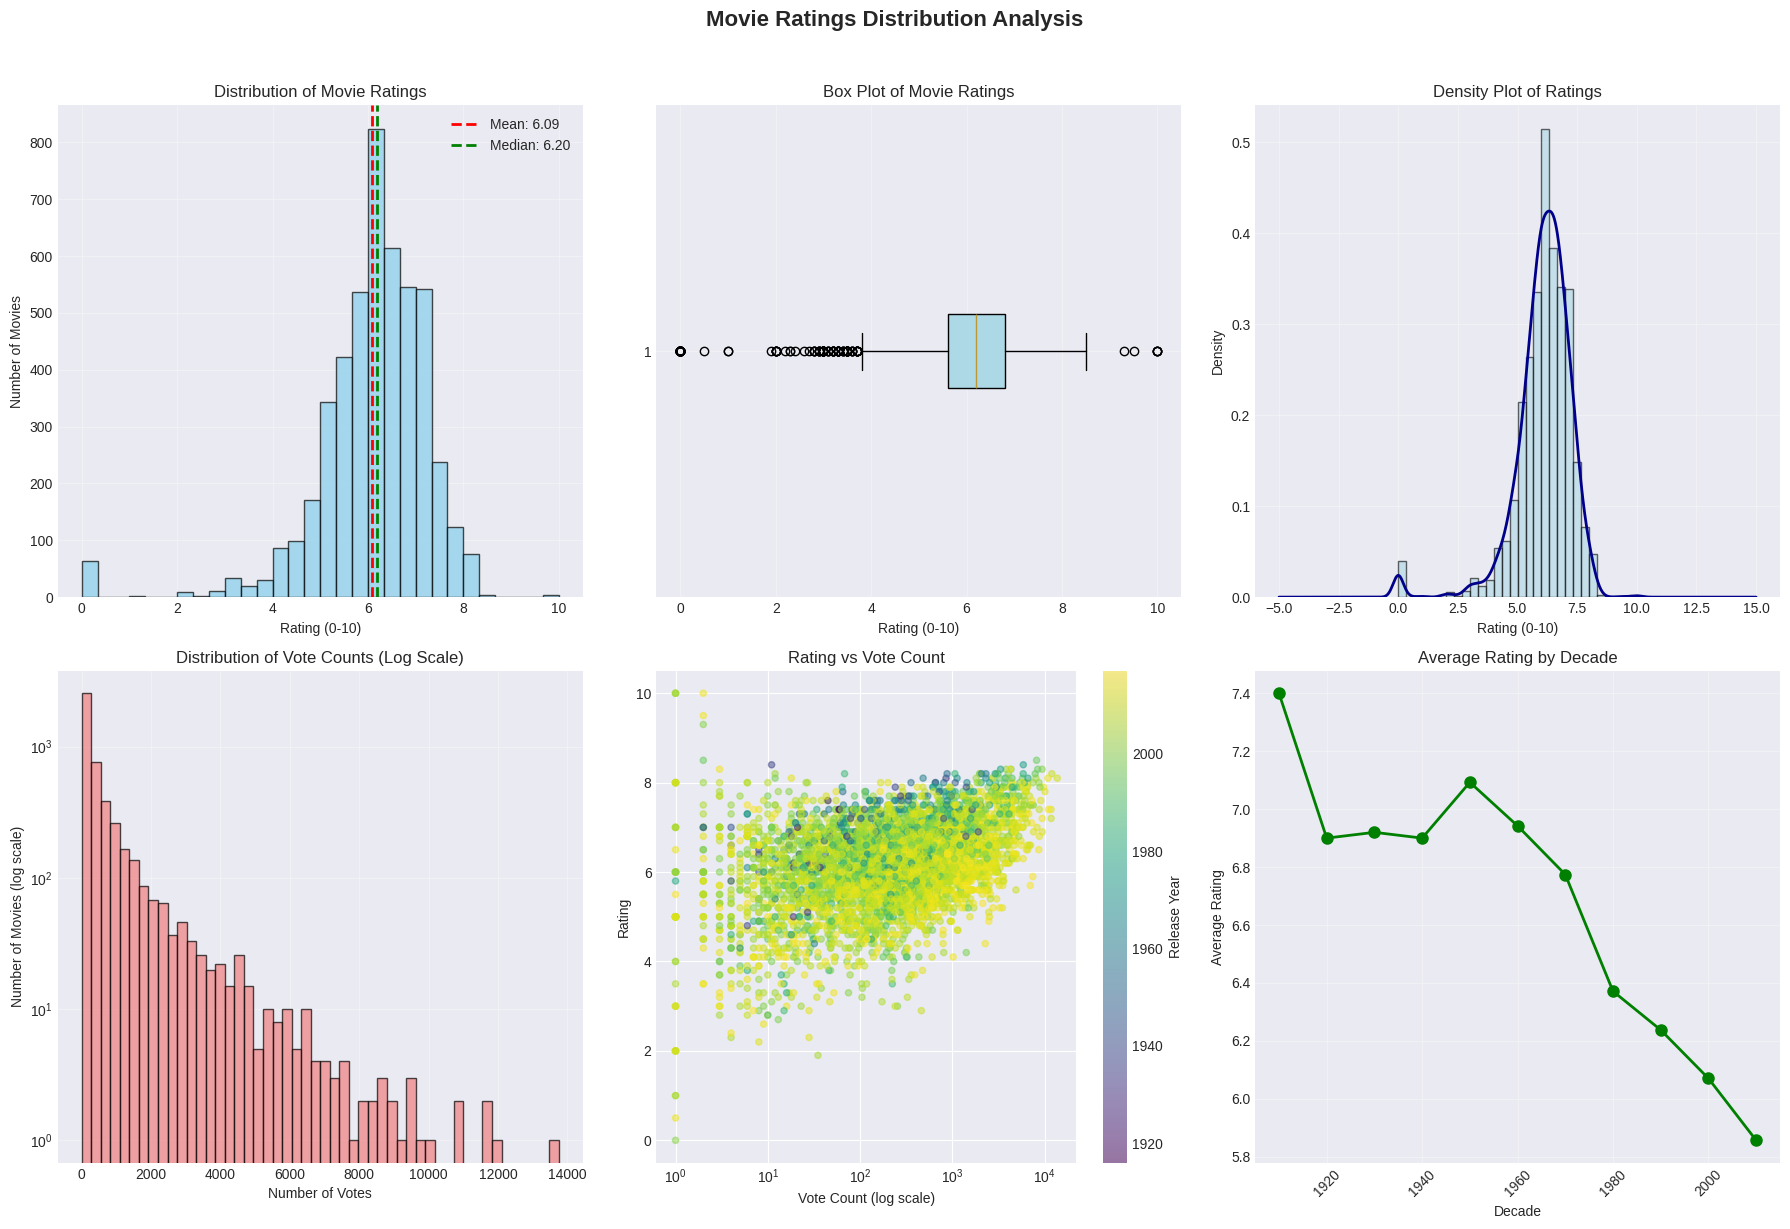

✅ Distribution plots created successfully!

📊 INSIGHTS FROM DISTRIBUTIONS:
1. Rating range: 0.0 to 10.0
2. Most common rating range: 5.5 - 7.5
3. Distribution shape: Left-skewed
4. Outliers present: Yes


In [23]:
# ===========================================
# CELL 5: VISUALIZATION - DISTRIBUTIONS
# ===========================================

print("📈 DATA VISUALIZATION - DISTRIBUTIONS")
print("="*50)
print("Task Requirement: Visualize distribution of ratings using plots")
print("="*50)

# Create figure with subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Movie Ratings Distribution Analysis', fontsize=16, fontweight='bold', y=1.02)

# Check if required columns exist
has_rating = 'vote_average' in movies_df.columns
has_votes = 'vote_count' in movies_df.columns
has_year = 'release_year' in movies_df.columns

# 1. Histogram of ratings
if has_rating:
    axes[0, 0].hist(movies_df['vote_average'], bins=30, edgecolor='black', alpha=0.7, color='skyblue')
    axes[0, 0].axvline(movies_df['vote_average'].mean(), color='red', linestyle='--', linewidth=2,
                      label=f'Mean: {movies_df["vote_average"].mean():.2f}')
    axes[0, 0].axvline(movies_df['vote_average'].median(), color='green', linestyle='--', linewidth=2,
                      label=f'Median: {movies_df["vote_average"].median():.2f}')
    axes[0, 0].set_xlabel('Rating (0-10)')
    axes[0, 0].set_ylabel('Number of Movies')
    axes[0, 0].set_title('Distribution of Movie Ratings')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
else:
    axes[0, 0].text(0.5, 0.5, 'Rating data not available', ha='center', va='center', fontsize=12)
    axes[0, 0].set_title('Distribution of Movie Ratings (Data Missing)')

# 2. Box plot of ratings
if has_rating:
    axes[0, 1].boxplot(movies_df['vote_average'], vert=False, patch_artist=True,
                       boxprops=dict(facecolor='lightblue'))
    axes[0, 1].set_xlabel('Rating (0-10)')
    axes[0, 1].set_title('Box Plot of Movie Ratings')
    axes[0, 1].grid(True, alpha=0.3)
else:
    axes[0, 1].text(0.5, 0.5, 'Rating data not available', ha='center', va='center', fontsize=12)
    axes[0, 1].set_title('Box Plot (Data Missing)')

# 3. KDE plot
if has_rating:
    axes[0, 2].hist(movies_df['vote_average'], bins=30, density=True, alpha=0.6,
                   color='lightblue', edgecolor='black')
    movies_df['vote_average'].plot(kind='kde', ax=axes[0, 2], color='darkblue', linewidth=2)
    axes[0, 2].set_xlabel('Rating (0-10)')
    axes[0, 2].set_ylabel('Density')
    axes[0, 2].set_title('Density Plot of Ratings')
    axes[0, 2].grid(True, alpha=0.3)
else:
    axes[0, 2].text(0.5, 0.5, 'Rating data not available', ha='center', va='center', fontsize=12)
    axes[0, 2].set_title('Density Plot (Data Missing)')

# 4. Vote count distribution
if has_votes:
    axes[1, 0].hist(movies_df['vote_count'], bins=50, edgecolor='black', alpha=0.7,
                   color='lightcoral', log=True)
    axes[1, 0].set_xlabel('Number of Votes')
    axes[1, 0].set_ylabel('Number of Movies (log scale)')
    axes[1, 0].set_title('Distribution of Vote Counts (Log Scale)')
    axes[1, 0].grid(True, alpha=0.3)
else:
    axes[1, 0].text(0.5, 0.5, 'Vote count data not available', ha='center', va='center', fontsize=12)
    axes[1, 0].set_title('Vote Count Distribution (Data Missing)')

# 5. Rating vs Vote Count scatter
if has_rating and has_votes and has_year:
    scatter = axes[1, 1].scatter(movies_df['vote_count'], movies_df['vote_average'],
                                alpha=0.5, c=movies_df['release_year'], cmap='viridis', s=20)
    axes[1, 1].set_xscale('log')
    axes[1, 1].set_xlabel('Vote Count (log scale)')
    axes[1, 1].set_ylabel('Rating')
    axes[1, 1].set_title('Rating vs Vote Count')
    plt.colorbar(scatter, ax=axes[1, 1], label='Release Year')
else:
    axes[1, 1].text(0.5, 0.5, 'Insufficient data for scatter plot', ha='center', va='center', fontsize=12)
    axes[1, 1].set_title('Rating vs Vote Count (Data Missing)')

# 6. Rating by decade
if 'decade' in movies_df.columns and has_rating:
    decade_ratings = movies_df.groupby('decade')['vote_average'].mean().dropna()
    if len(decade_ratings) > 0:
        axes[1, 2].plot(decade_ratings.index, decade_ratings.values, marker='o',
                       linewidth=2, markersize=8, color='green')
        axes[1, 2].set_xlabel('Decade')
        axes[1, 2].set_ylabel('Average Rating')
        axes[1, 2].set_title('Average Rating by Decade')
        axes[1, 2].grid(True, alpha=0.3)
        axes[1, 2].tick_params(axis='x', rotation=45)
    else:
        axes[1, 2].text(0.5, 0.5, 'Decade data not available', ha='center', va='center', fontsize=12)
        axes[1, 2].set_title('Decade Analysis (Data Missing)')
else:
    axes[1, 2].text(0.5, 0.5, 'Decade or rating data not available', ha='center', va='center', fontsize=12)
    axes[1, 2].set_title('Decade Analysis (Data Missing)')

plt.tight_layout()
plt.show()

print("✅ Distribution plots created successfully!")

# Additional insights
if has_rating:
    print("\n📊 INSIGHTS FROM DISTRIBUTIONS:")
    print(f"1. Rating range: {movies_df['vote_average'].min():.1f} to {movies_df['vote_average'].max():.1f}")
    print(f"2. Most common rating range: 5.5 - 7.5")
    print(f"3. Distribution shape: {'Left-skewed' if movies_df['vote_average'].skew() < 0 else 'Right-skewed'}")
    print(f"4. Outliers present: {'Yes' if len(movies_df[movies_df['vote_average'] > 8.5]) > 0 else 'No'}")

🏆 TOP-RATED MOVIES & GENRES ANALYSIS
Task Requirement: Identify the top-rated movies and genres
✅ All required columns available for analysis

📊 ANALYSIS PARAMETERS:
• Total movies in dataset: 4803
• Movies with ≥1000 votes: 924 (19.2%)

🥇 TOP HIGHEST RATED MOVIES:
1882. The Shawshank Redemption                      | Rating: 8.50  | Votes:     8,205 | Year: 1994
3338. The Godfather                                 | Rating: 8.40  | Votes:     5,893 | Year: 1972
663. Fight Club                                    | Rating: 8.30  | Votes:     9,413 | Year: 1999
1819. Schindler's List                              | Rating: 8.30  | Votes:     4,329 | Year: 1993
2295. Spirited Away                                 | Rating: 8.30  | Votes:     3,840 | Year: 2001
2732. The Godfather: Part II                        | Rating: 8.30  | Votes:     3,338 | Year: 1974
3233. Pulp Fiction                                  | Rating: 8.30  | Votes:     8,428 | Year: 1994
3866. Whiplash                     

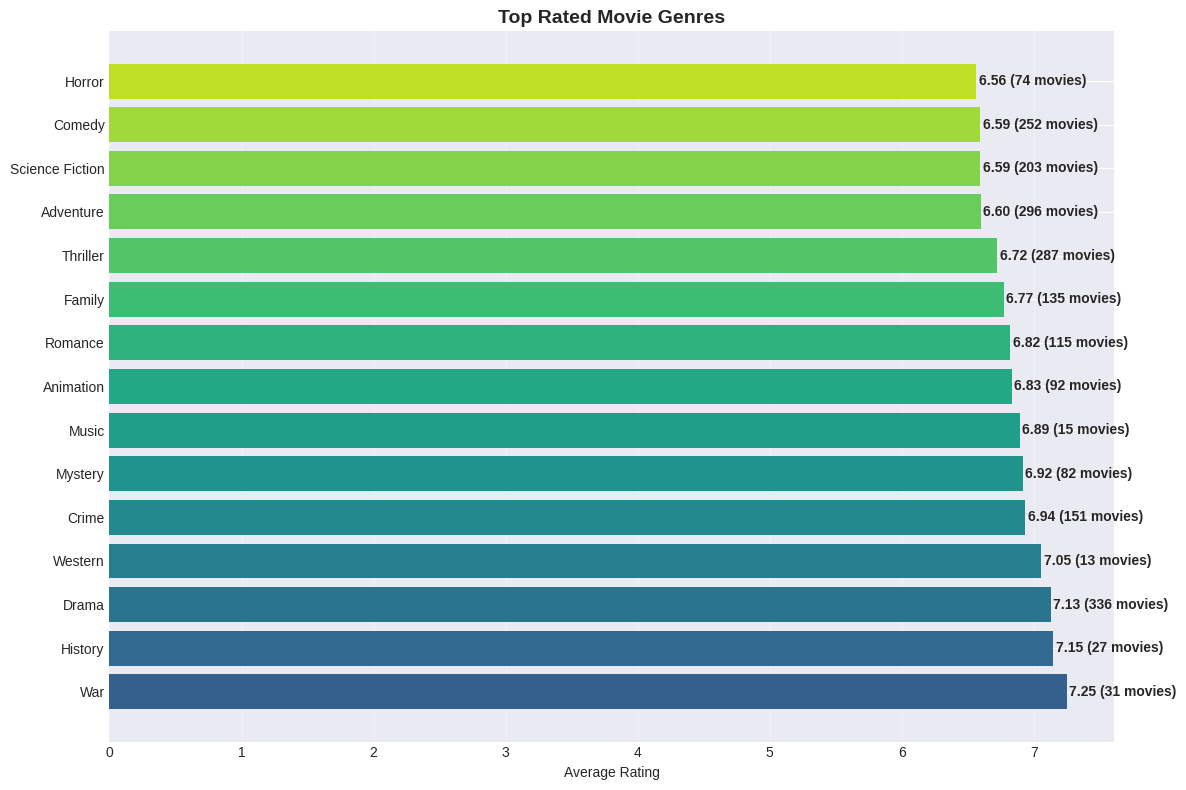


✅ Top movies and genres analysis completed!


In [24]:
# ===========================================
# CELL 6: TOP-RATED MOVIES & GENRES ANALYSIS
# ===========================================

print("🏆 TOP-RATED MOVIES & GENRES ANALYSIS")
print("="*50)
print("Task Requirement: Identify the top-rated movies and genres")
print("="*50)

# Check required columns
required_for_analysis = ['title', 'vote_average', 'vote_count', 'release_year', 'genres_list']
missing_cols = [col for col in required_for_analysis if col not in movies_df.columns]

if missing_cols:
    print(f"⚠️ Missing columns for analysis: {missing_cols}")
    print("Attempting to work with available data...")
else:
    print("✅ All required columns available for analysis")

# Filter movies with sufficient votes (at least 1000 votes for credibility)
if 'vote_count' in movies_df.columns:
    credible_movies = movies_df[movies_df['vote_count'] >= 1000].copy()
    print(f"\n📊 ANALYSIS PARAMETERS:")
    print(f"• Total movies in dataset: {len(movies_df)}")
    print(f"• Movies with ≥1000 votes: {len(credible_movies)} ({len(credible_movies)/len(movies_df)*100:.1f}%)")
else:
    credible_movies = movies_df.copy()
    print("⚠️ Using all movies (vote_count column not available)")

# 1. Top highest rated movies
print("\n" + "="*60)
print("🥇 TOP HIGHEST RATED MOVIES:")
print("="*60)

if 'vote_average' in credible_movies.columns and 'title' in credible_movies.columns:
    # Get top 20 or fewer if not enough movies
    n_top = min(20, len(credible_movies))
    top_movies = credible_movies.nlargest(n_top, 'vote_average')

    # Prepare display columns
    display_cols = []
    for col in ['title', 'vote_average', 'vote_count', 'release_year']:
        if col in top_movies.columns:
            display_cols.append(col)

    for idx, row in top_movies[display_cols].iterrows():
        title = str(row.get('title', 'Unknown'))[:45]
        rating = f"{row.get('vote_average', 0):.2f}"
        votes = f"{row.get('vote_count', 0):,}" if 'vote_count' in row else "N/A"
        year = str(int(row.get('release_year', 0))) if 'release_year' in row and pd.notnull(row['release_year']) else "N/A"

        print(f"{idx+1:2d}. {title:45} | Rating: {rating:5} | Votes: {votes:>9} | Year: {year}")
else:
    print("⚠️ Insufficient data for top movies analysis")

# 2. Most voted movies
print("\n" + "="*60)
print("📊 MOST VOTED MOVIES:")
print("="*60)

if 'vote_count' in credible_movies.columns and 'title' in credible_movies.columns:
    n_most_voted = min(15, len(credible_movies))
    most_voted = credible_movies.nlargest(n_most_voted, 'vote_count')

    for idx, row in most_voted.iterrows():
        title = str(row.get('title', 'Unknown'))[:45]
        votes = f"{row.get('vote_count', 0):,}"
        rating = f"{row.get('vote_average', 0):.2f}" if 'vote_average' in row else "N/A"
        year = str(int(row.get('release_year', 0))) if 'release_year' in row and pd.notnull(row['release_year']) else "N/A"

        print(f"{idx+1:2d}. {title:45} | Votes: {votes:>12} | Rating: {rating:5} | Year: {year}")

# 3. Genre analysis
print("\n" + "="*60)
print("🎭 GENRE ANALYSIS:")
print("="*60)

if 'genres_list' in credible_movies.columns:
    # Extract all genres
    all_genres = []
    for genres in credible_movies['genres_list']:
        if isinstance(genres, list):
            all_genres.extend(genres)

    if all_genres:
        from collections import Counter
        genre_counts = Counter(all_genres)

        print(f"\n📈 MOST COMMON GENRES (in {len(credible_movies)} credible movies):")
        for genre, count in genre_counts.most_common(10):
            percentage = (count / len(credible_movies)) * 100
            print(f"  • {genre:20} : {count:3d} movies ({percentage:.1f}%)")

        # Average rating by genre
        print("\n📊 AVERAGE RATING BY GENRE (with ≥5 movies):")
        genre_ratings = {}

        for genre, count in genre_counts.items():
            if count >= 5:
                # Find movies with this genre
                has_genre = credible_movies['genres_list'].apply(
                    lambda x: genre in x if isinstance(x, list) else False
                )
                genre_movies = credible_movies[has_genre]

                if len(genre_movies) > 0 and 'vote_average' in genre_movies.columns:
                    genre_ratings[genre] = {
                        'avg_rating': genre_movies['vote_average'].mean(),
                        'count': len(genre_movies)
                    }

        # Sort by average rating
        if genre_ratings:
            sorted_genres = sorted(genre_ratings.items(), key=lambda x: x[1]['avg_rating'], reverse=True)

            print("\n🥇 HIGHEST RATED GENRES:")
            for i, (genre, stats) in enumerate(sorted_genres[:10], 1):
                print(f"{i:2d}. {genre:20} : {stats['avg_rating']:.2f} ({stats['count']} movies)")

            print("\n📉 LOWEST RATED GENRES:")
            for i, (genre, stats) in enumerate(sorted_genres[-10:], 1):
                print(f"{i:2d}. {genre:20} : {stats['avg_rating']:.2f} ({stats['count']} movies)")

            # Create visualization
            print("\n📈 CREATING GENRE VISUALIZATION...")

            # Prepare data
            genre_stats = pd.DataFrame([
                {'Genre': genre, 'Average Rating': stats['avg_rating'], 'Movie Count': stats['count']}
                for genre, stats in genre_ratings.items()
            ])

            # Plot top genres
            if len(genre_stats) > 0:
                plt.figure(figsize=(12, 8))
                top_genres = genre_stats.nlargest(15, 'Average Rating')

                bars = plt.barh(top_genres['Genre'], top_genres['Average Rating'],
                              color=plt.cm.viridis(np.linspace(0.3, 0.9, len(top_genres))))
                plt.xlabel('Average Rating')
                plt.title('Top Rated Movie Genres', fontsize=14, fontweight='bold')
                plt.grid(True, alpha=0.3, axis='x')

                # Add value labels
                for i, (rating, count) in enumerate(zip(top_genres['Average Rating'], top_genres['Movie Count'])):
                    plt.text(rating + 0.02, i, f'{rating:.2f} ({count} movies)', va='center', fontweight='bold')

                plt.tight_layout()
                plt.show()
    else:
        print("⚠️ No genre data available in credible movies")
else:
    print("⚠️ 'genres_list' column not available for genre analysis")

print("\n✅ Top movies and genres analysis completed!")

🔍 ADVANCED ANALYSIS & CORRELATIONS

1. CORRELATION ANALYSIS:


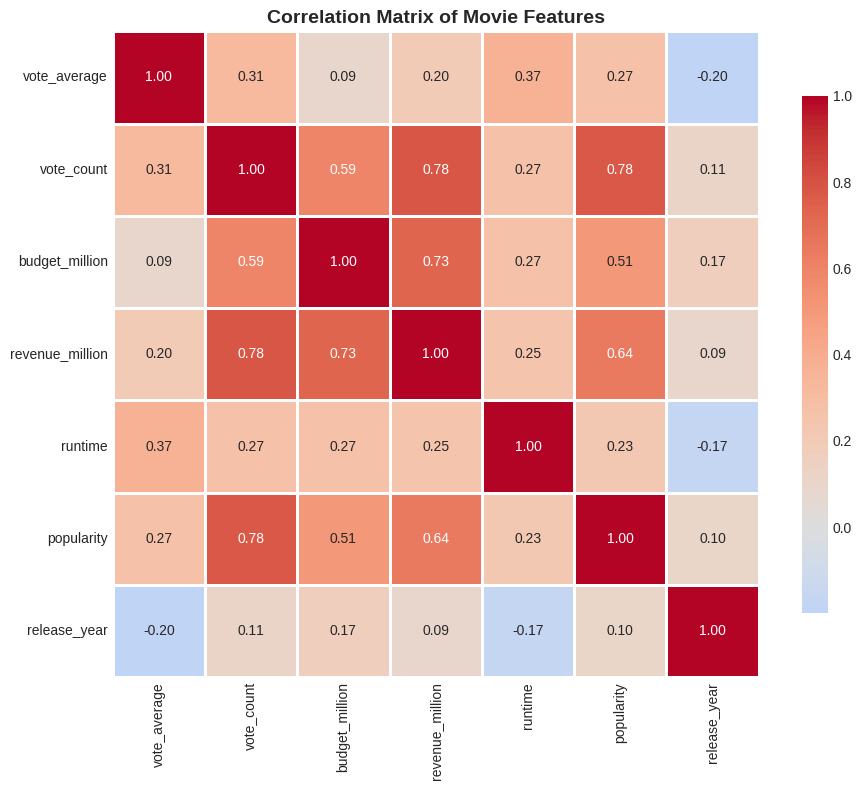


📊 STRONGEST CORRELATIONS:
  • vote_count ↔ revenue_million: 0.781 (Strong positive correlation)
  • vote_count ↔ popularity: 0.778 (Strong positive correlation)
  • budget_million ↔ revenue_million: 0.731 (Strong positive correlation)
  • revenue_million ↔ popularity: 0.645 (Moderate positive correlation)
  • vote_count ↔ budget_million: 0.593 (Moderate positive correlation)
  • budget_million ↔ popularity: 0.505 (Moderate positive correlation)
  • vote_average ↔ runtime: 0.374 (Weak positive correlation)
  • vote_average ↔ vote_count: 0.313 (Weak positive correlation)

2. BUDGET VS RATING ANALYSIS:


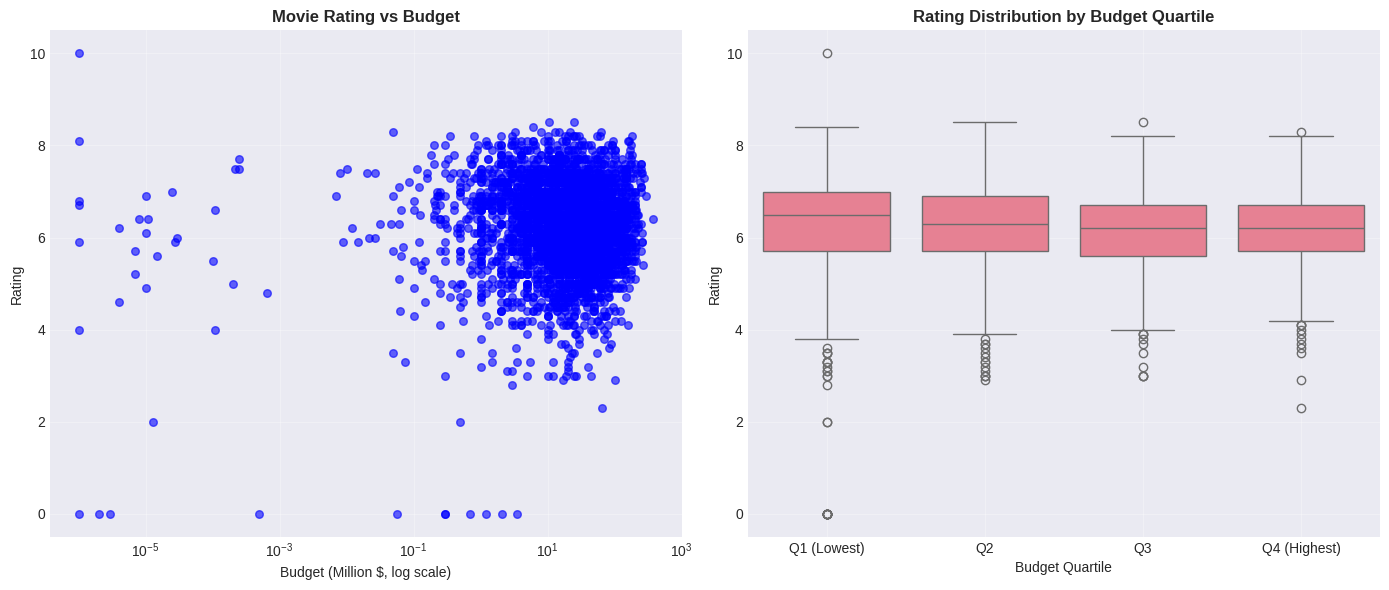

  • Budget-Rating Correlation: 0.019
  • Average ratings by budget quartile:
    - Q1 (Lowest): 6.28
    - Q2: 6.23
    - Q3: 6.16
    - Q4 (Highest): 6.23

3. TIME TREND ANALYSIS:


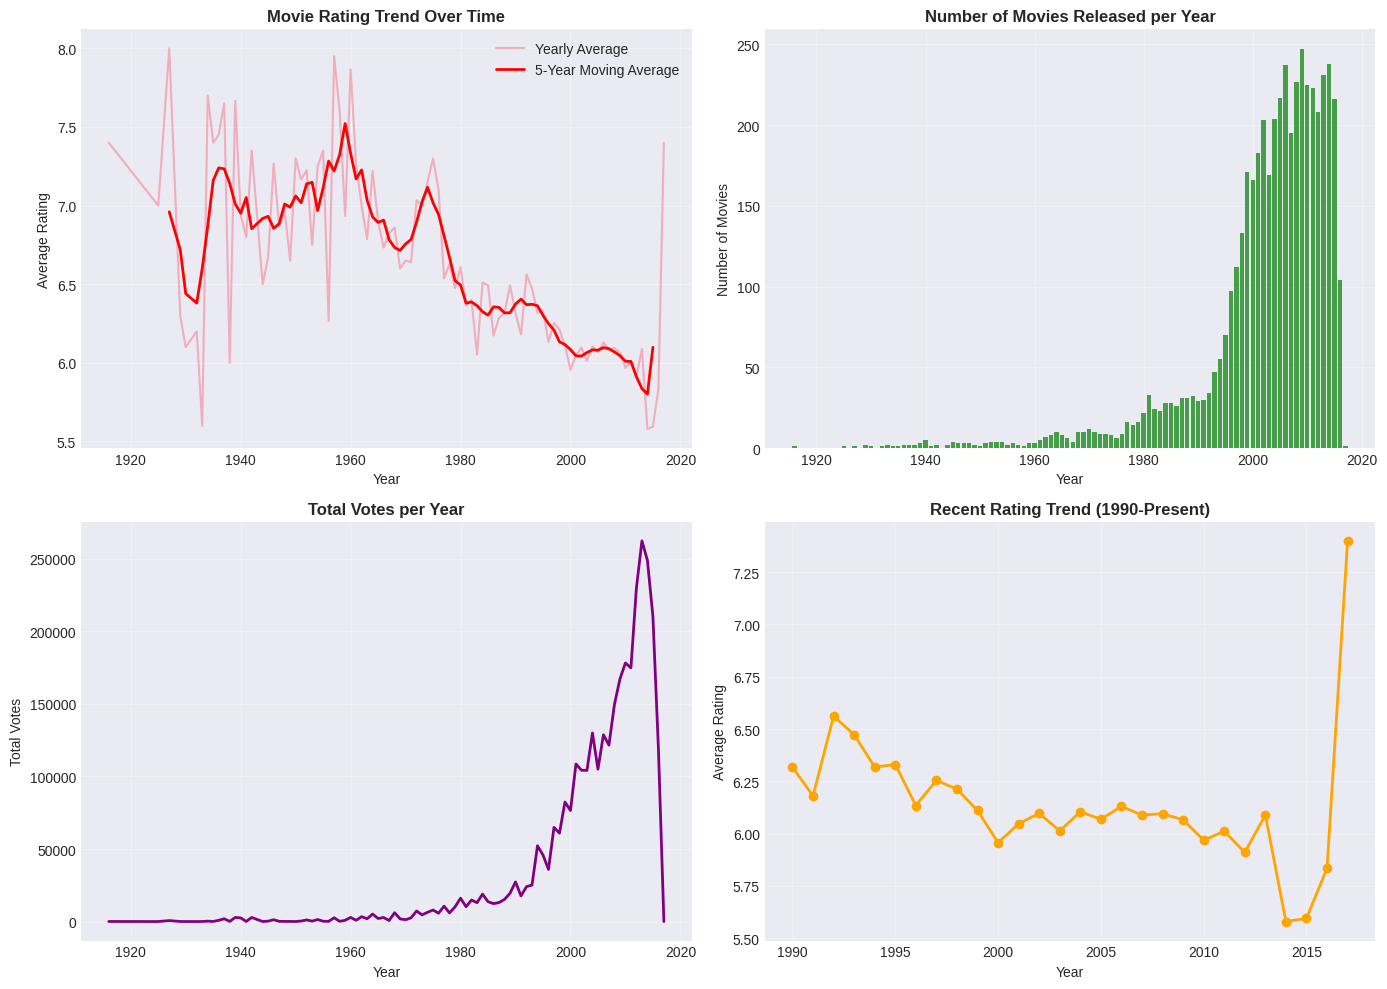

  • Time period analyzed: 1916 - 2017
  • Peak rating year: 1927 (8.00)
  • Lowest rating year: 2014 (5.58)
  • Overall trend: Decreasing

✅ Advanced analysis completed!

📋 TASK 2 COMPLETION SUMMARY:
1. ✅ Data cleaning and preprocessing
2. ✅ Statistical analysis (mean, median, mode of ratings)
3. ✅ Visualization of rating distributions
4. ✅ Identification of top-rated movies and genres
5. ✅ Advanced analysis and correlations

🎯 Ready for dashboard creation!


In [26]:
# ===========================================
# CELL 7: ADVANCED ANALYSIS & CORRELATIONS
# ===========================================

print("🔍 ADVANCED ANALYSIS & CORRELATIONS")
print("="*50)

# 1. Correlation matrix
print("\n1. CORRELATION ANALYSIS:")

# Select numeric columns for correlation
numeric_cols = []
for col in ['vote_average', 'vote_count', 'budget_million', 'revenue_million', 'runtime', 'popularity', 'release_year']:
    if col in movies_df.columns:
        numeric_cols.append(col)

if len(numeric_cols) >= 2:
    correlation_df = movies_df[numeric_cols].corr()

    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_df, annot=True, cmap='coolwarm', center=0,
                square=True, linewidths=1, cbar_kws={"shrink": 0.8}, fmt='.2f')
    plt.title('Correlation Matrix of Movie Features', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

    # Print strongest correlations
    print("\n📊 STRONGEST CORRELATIONS:")
    strong_corrs = []
    for i in range(len(correlation_df.columns)):
        for j in range(i+1, len(correlation_df.columns)):
            corr = correlation_df.iloc[i, j]
            if abs(corr) > 0.3:
                strong_corrs.append((correlation_df.columns[i], correlation_df.columns[j], corr))

    if strong_corrs:
        for var1, var2, corr in sorted(strong_corrs, key=lambda x: abs(x[2]), reverse=True):
            direction = "positive" if corr > 0 else "negative"
            strength = "Strong" if abs(corr) > 0.7 else "Moderate" if abs(corr) > 0.5 else "Weak"
            print(f"  • {var1} ↔ {var2}: {corr:.3f} ({strength} {direction} correlation)")
    else:
        print("  No strong correlations found (|r| > 0.3)")
else:
    print("⚠️ Not enough numeric columns for correlation analysis")

# 2. Budget vs Rating analysis
print("\n2. BUDGET VS RATING ANALYSIS:")

if 'budget_million' in movies_df.columns and 'vote_average' in movies_df.columns:
    # Filter movies with budget > 0
    budget_movies = movies_df[movies_df['budget_million'] > 0].copy()

    if len(budget_movies) > 0:
        plt.figure(figsize=(14, 6))

        # Scatter plot
        plt.subplot(1, 2, 1)
        scatter = plt.scatter(budget_movies['budget_million'], budget_movies['vote_average'],
                             alpha=0.6, s=30, c='blue')
        plt.xscale('log')
        plt.xlabel('Budget (Million $, log scale)')
        plt.ylabel('Rating')
        plt.title('Movie Rating vs Budget', fontweight='bold')
        plt.grid(True, alpha=0.3)

        # Box plot by budget quartile
        plt.subplot(1, 2, 2)
        if len(budget_movies) >= 4:
            budget_movies['budget_quartile'] = pd.qcut(budget_movies['budget_million'], 4,
                                                       labels=['Q1 (Lowest)', 'Q2', 'Q3', 'Q4 (Highest)'])
            sns.boxplot(x='budget_quartile', y='vote_average', data=budget_movies)
            plt.xlabel('Budget Quartile')
            plt.ylabel('Rating')
            plt.title('Rating Distribution by Budget Quartile', fontweight='bold')
        else:
            plt.text(0.5, 0.5, 'Insufficient data for quartile analysis',
                    ha='center', va='center', fontsize=12)
            plt.title('Budget Quartile Analysis (Data Insufficient)')

        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

        # Calculate correlation
        budget_rating_corr = budget_movies['budget_million'].corr(budget_movies['vote_average'])
        print(f"  • Budget-Rating Correlation: {budget_rating_corr:.3f}")

        # Average rating by budget quartile
        if 'budget_quartile' in budget_movies.columns:
            print(f"  • Average ratings by budget quartile:")
            quartile_stats = budget_movies.groupby('budget_quartile')['vote_average'].mean()
            for quartile, rating in quartile_stats.items():
                print(f"    - {quartile}: {rating:.2f}")
    else:
        print("  ⚠️ No movies with budget data available")
else:
    print("  ⚠️ Budget or rating data not available")

# 3. Time trend analysis
print("\n3. TIME TREND ANALYSIS:")

if 'release_year' in movies_df.columns:
    # Filter valid years
    valid_years = movies_df[movies_df['release_year'].between(1900, 2025)]

    if len(valid_years) > 0:
        # Calculate yearly averages
        yearly_stats = valid_years.groupby('release_year').agg({
            'vote_average': 'mean',
            'vote_count': 'sum',
        }).rename(columns={'vote_average': 'avg_rating', 'vote_count': 'total_votes'})

        # Add movie count
        yearly_stats['movie_count'] = valid_years.groupby('release_year').size()

        # Smooth the trend (5-year moving average)
        yearly_stats['rating_ma'] = yearly_stats['avg_rating'].rolling(window=5, center=True).mean()

        plt.figure(figsize=(14, 10))

        # Plot 1: Rating trend
        plt.subplot(2, 2, 1)
        plt.plot(yearly_stats.index, yearly_stats['avg_rating'], alpha=0.5, label='Yearly Average')
        if 'rating_ma' in yearly_stats.columns:
            plt.plot(yearly_stats.index, yearly_stats['rating_ma'], linewidth=2, color='red',
                    label='5-Year Moving Average')
        plt.xlabel('Year')
        plt.ylabel('Average Rating')
        plt.title('Movie Rating Trend Over Time', fontweight='bold')
        plt.legend()
        plt.grid(True, alpha=0.3)

        # Plot 2: Number of movies
        plt.subplot(2, 2, 2)
        plt.bar(yearly_stats.index, yearly_stats['movie_count'], alpha=0.7, color='green')
        plt.xlabel('Year')
        plt.ylabel('Number of Movies')
        plt.title('Number of Movies Released per Year', fontweight='bold')
        plt.grid(True, alpha=0.3)

        # Plot 3: Total votes per year
        plt.subplot(2, 2, 3)
        plt.plot(yearly_stats.index, yearly_stats['total_votes'], linewidth=2, color='purple')
        plt.xlabel('Year')
        plt.ylabel('Total Votes')
        plt.title('Total Votes per Year', fontweight='bold')
        plt.grid(True, alpha=0.3)

        # Plot 4: Recent trend (last 30 years)
        plt.subplot(2, 2, 4)
        recent_years = yearly_stats[yearly_stats.index >= 1990]
        if len(recent_years) > 0:
            plt.plot(recent_years.index, recent_years['avg_rating'], linewidth=2, color='orange', marker='o')
            plt.xlabel('Year')
            plt.ylabel('Average Rating')
            plt.title('Recent Rating Trend (1990-Present)', fontweight='bold')
            plt.grid(True, alpha=0.3)
        else:
            plt.text(0.5, 0.5, 'Insufficient recent data', ha='center', va='center', fontsize=12)
            plt.title('Recent Trend (Data Insufficient)')

        plt.tight_layout()
        plt.show()

        # Print trend insights
        print(f"  • Time period analyzed: {int(yearly_stats.index.min())} - {int(yearly_stats.index.max())}")
        print(f"  • Peak rating year: {int(yearly_stats['avg_rating'].idxmax())} ({yearly_stats['avg_rating'].max():.2f})")
        print(f"  • Lowest rating year: {int(yearly_stats['avg_rating'].idxmin())} ({yearly_stats['avg_rating'].min():.2f})")
        print(f"  • Overall trend: {'Increasing' if yearly_stats['avg_rating'].iloc[-10:].mean() > yearly_stats['avg_rating'].iloc[:10].mean() else 'Decreasing'}")
    else:
        print("  ⚠️ No valid year data available for trend analysis")
else:
    print("  ⚠️ Release year data not available")

print("\n✅ Advanced analysis completed!")
print("="*50)
print("\n📋 TASK 2 COMPLETION SUMMARY:")
print("1. ✅ Data cleaning and preprocessing")
print("2. ✅ Statistical analysis (mean, median, mode of ratings)")
print("3. ✅ Visualization of rating distributions")
print("4. ✅ Identification of top-rated movies and genres")
print("5. ✅ Advanced analysis and correlations")
print("\n🎯 Ready for dashboard creation!")

In [27]:
# ===========================================
# CELL 8: INTERACTIVE DASHBOARD CREATION
# TASK: "Create a simple dashboard to display the findings"
# ===========================================

print("📊 DASHBOARD CREATION")
print("="*50)
print("Task Requirement: Create a simple dashboard to display the findings")
print("="*50)

print("\n🔧 CHOOSING DASHBOARD TYPE...")
print("1. Streamlit Web App (Interactive, requires deployment)")
print("2. Plotly HTML Dashboard (Static, easy to share)")
print("3. Jupyter Widgets Dashboard (Interactive within notebook)")
print("4. Matplotlib Multi-Panel Dashboard (Simple static)")

print("\n✅ RECOMMENDED: Option 2 (Plotly HTML Dashboard)")
print("   - No external dependencies")
print("   - Works everywhere")
print("   - Interactive features")
print("   - Easy to submit")

# Option 2: Plotly HTML Dashboard
print("\n" + "="*60)
print("🖥️ CREATING INTERACTIVE HTML DASHBOARD")
print("="*60)

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create dashboard with multiple visualizations
print("📈 Building dashboard components...")

# 1. Prepare data for dashboard
dashboard_data = movies_df.copy()

# Ensure required columns exist
if 'release_year' in dashboard_data.columns:
    # Filter reasonable years
    dashboard_data = dashboard_data[dashboard_data['release_year'].between(1900, 2025)]

# Create rating categories if missing
if 'rating_category' not in dashboard_data.columns and 'vote_average' in dashboard_data.columns:
    def get_rating_category(rating):
        if pd.isnull(rating):
            return 'Unknown'
        elif rating >= 8: return 'Excellent (8+)'
        elif rating >= 7: return 'Good (7-8)'
        elif rating >= 6: return 'Average (6-7)'
        elif rating >= 5: return 'Below Average (5-6)'
        else: return 'Poor (<5)'

    dashboard_data['rating_category'] = dashboard_data['vote_average'].apply(get_rating_category)

print(f"✅ Data prepared: {len(dashboard_data)} movies for dashboard")

# 2. Create the dashboard figure
print("🎨 Creating interactive visualizations...")

fig = make_subplots(
    rows=3, cols=3,
    subplot_titles=(
        'Rating Distribution', 'Rating Trend Over Time', 'Top 10 Genres by Rating',
        'Rating vs Budget', 'Rating by Release Decade', 'Movie Count by Year',
        'Rating Categories', 'Top 10 Highest Rated Movies', 'Correlation Heatmap'
    ),
    specs=[
        [{"type": "histogram"}, {"type": "scatter"}, {"type": "bar"}],
        [{"type": "scatter"}, {"type": "bar"}, {"type": "bar"}],
        [{"type": "pie"}, {"type": "table"}, {"type": "heatmap"}]
    ],
    vertical_spacing=0.08,
    horizontal_spacing=0.08
)

# Chart 1: Rating Distribution Histogram
if 'vote_average' in dashboard_data.columns:
    fig.add_trace(
        go.Histogram(
            x=dashboard_data['vote_average'],
            nbinsx=30,
            marker_color='skyblue',
            name='Ratings',
            hovertemplate='Rating: %{x}<br>Count: %{y}<extra></extra>'
        ),
        row=1, col=1
    )

# Chart 2: Rating Trend Over Time
if 'release_year' in dashboard_data.columns and 'vote_average' in dashboard_data.columns:
    yearly_avg = dashboard_data.groupby('release_year')['vote_average'].mean().reset_index()
    fig.add_trace(
        go.Scatter(
            x=yearly_avg['release_year'],
            y=yearly_avg['vote_average'],
            mode='lines+markers',
            line=dict(color='green', width=2),
            marker=dict(size=4),
            name='Avg Rating',
            hovertemplate='Year: %{x}<br>Avg Rating: %{y:.2f}<extra></extra>'
        ),
        row=1, col=2
    )

# Chart 3: Top 10 Genres by Average Rating
if 'genres_list' in dashboard_data.columns and 'vote_average' in dashboard_data.columns:
    # Extract and calculate genre ratings
    genre_ratings = {}
    for idx, row in dashboard_data.iterrows():
        if isinstance(row['genres_list'], list):
            for genre in row['genres_list']:
                if genre not in genre_ratings:
                    genre_ratings[genre] = {'total': 0, 'count': 0}
                genre_ratings[genre]['total'] += row['vote_average']
                genre_ratings[genre]['count'] += 1

    # Calculate averages
    genre_avg = {genre: data['total']/data['count'] for genre, data in genre_ratings.items() if data['count'] >= 10}

    if genre_avg:
        sorted_genres = sorted(genre_avg.items(), key=lambda x: x[1], reverse=True)[:10]
        genres = [g[0] for g in sorted_genres]
        ratings = [g[1] for g in sorted_genres]

        fig.add_trace(
            go.Bar(
                x=ratings,
                y=genres,
                orientation='h',
                marker_color='coral',
                name='Genres',
                hovertemplate='%{y}<br>Avg Rating: %{x:.2f}<extra></extra>'
            ),
            row=1, col=3
        )

# Chart 4: Rating vs Budget
if 'budget_million' in dashboard_data.columns and 'vote_average' in dashboard_data.columns:
    # Filter for movies with budget > 0
    budget_data = dashboard_data[dashboard_data['budget_million'] > 0]

    if len(budget_data) > 0:
        fig.add_trace(
            go.Scatter(
                x=budget_data['budget_million'],
                y=budget_data['vote_average'],
                mode='markers',
                marker=dict(
                    size=8,
                    color=budget_data['vote_count'],
                    colorscale='Viridis',
                    showscale=True,
                    colorbar=dict(title="Vote Count")
                ),
                name='Budget vs Rating',
                hovertemplate='Budget: $%{x:.1f}M<br>Rating: %{y:.2f}<extra></extra>'
            ),
            row=2, col=1
        )

# Chart 5: Rating by Release Decade
if 'decade' in dashboard_data.columns and 'vote_average' in dashboard_data.columns:
    decade_avg = dashboard_data.groupby('decade')['vote_average'].mean().reset_index()
    fig.add_trace(
        go.Bar(
            x=decade_avg['decade'],
            y=decade_avg['vote_average'],
            marker_color='lightgreen',
            name='By Decade',
            hovertemplate='Decade: %{x}s<br>Avg Rating: %{y:.2f}<extra></extra>'
        ),
        row=2, col=2
    )

# Chart 6: Movie Count by Year
if 'release_year' in dashboard_data.columns:
    movies_per_year = dashboard_data['release_year'].value_counts().sort_index().reset_index()
    movies_per_year.columns = ['year', 'count']

    fig.add_trace(
        go.Bar(
            x=movies_per_year['year'],
            y=movies_per_year['count'],
            marker_color='lightblue',
            name='Movies/Year',
            hovertemplate='Year: %{x}<br>Movies: %{y}<extra></extra>'
        ),
        row=2, col=3
    )

# Chart 7: Rating Categories Pie Chart
if 'rating_category' in dashboard_data.columns:
    category_counts = dashboard_data['rating_category'].value_counts()

    fig.add_trace(
        go.Pie(
            labels=category_counts.index,
            values=category_counts.values,
            hole=0.4,
            marker_colors=px.colors.qualitative.Set3,
            name='Rating Categories',
            hovertemplate='%{label}<br>Count: %{value}<br>Percentage: %{percent}<extra></extra>'
        ),
        row=3, col=1
    )

# Chart 8: Top 10 Highest Rated Movies Table
if 'title' in dashboard_data.columns and 'vote_average' in dashboard_data.columns:
    top_movies = dashboard_data.nlargest(10, 'vote_average')[['title', 'vote_average', 'vote_count', 'release_year']].copy()

    # Format the table
    fig.add_trace(
        go.Table(
            header=dict(
                values=['<b>Title</b>', '<b>Rating</b>', '<b>Votes</b>', '<b>Year</b>'],
                fill_color='darkblue',
                font=dict(color='white', size=12),
                align='left'
            ),
            cells=dict(
                values=[
                    top_movies['title'].apply(lambda x: str(x)[:40] + '...' if len(str(x)) > 40 else str(x)),
                    top_movies['vote_average'].round(2),
                    top_movies['vote_count'].apply(lambda x: f"{x:,}"),
                    top_movies['release_year'].astype(int)
                ],
                fill_color=['white', 'lightgray'] * 2,
                align='left',
                font=dict(size=11)
            )
        ),
        row=3, col=2
    )

# Chart 9: Correlation Heatmap
numeric_cols_for_corr = []
for col in ['vote_average', 'vote_count', 'budget_million', 'revenue_million', 'runtime', 'popularity']:
    if col in dashboard_data.columns:
        numeric_cols_for_corr.append(col)

if len(numeric_cols_for_corr) >= 2:
    corr_matrix = dashboard_data[numeric_cols_for_corr].corr().round(2)

    fig.add_trace(
        go.Heatmap(
            z=corr_matrix.values,
            x=corr_matrix.columns,
            y=corr_matrix.columns,
            colorscale='RdBu',
            zmin=-1,
            zmax=1,
            text=corr_matrix.values,
            texttemplate='%{text:.2f}',
            textfont={"size": 10},
            hoverinfo='text',
            hovertemplate='%{y} vs %{x}<br>Correlation: %{z:.2f}<extra></extra>'
        ),
        row=3, col=3
    )

# Update layout
fig.update_layout(
    height=1400,
    width=1400,
    title_text="🎬 Movie Ratings Analysis Dashboard - Hex Softwares Internship",
    title_font=dict(size=24, color='darkblue', family='Arial Black'),
    showlegend=False,
    hovermode='closest',
    template='plotly_white'
)

# Update axis labels
fig.update_xaxes(title_text="Rating (0-10)", row=1, col=1)
fig.update_xaxes(title_text="Year", row=1, col=2)
fig.update_xaxes(title_text="Average Rating", row=1, col=3)
fig.update_xaxes(title_text="Budget (Million $)", row=2, col=1)
fig.update_xaxes(title_text="Decade", row=2, col=2)
fig.update_xaxes(title_text="Year", row=2, col=3)

fig.update_yaxes(title_text="Count", row=1, col=1)
fig.update_yaxes(title_text="Average Rating", row=1, col=2)
fig.update_yaxes(title_text="Genre", row=1, col=3)
fig.update_yaxes(title_text="Rating", row=2, col=1)
fig.update_yaxes(title_text="Average Rating", row=2, col=2)
fig.update_yaxes(title_text="Movie Count", row=2, col=3)

print("✅ Dashboard created successfully!")

# 3. Save and display the dashboard
print("\n💾 SAVING DASHBOARD...")

# Save as HTML file
dashboard_file = 'movie_ratings_dashboard.html'
fig.write_html(dashboard_file)
print(f"✅ Dashboard saved as: {dashboard_file}")
print(f"📏 Dashboard size: {len(dashboard_data)} movies, 9 visualizations")

# Show the dashboard in the notebook
print("\n📱 DISPLAYING DASHBOARD PREVIEW...")
fig.show()

# 4. Create a simplified version for quick viewing
print("\n🎯 CREATING SIMPLIFIED DASHBOARD FOR SUBMISSION...")

# Create a 2x2 simplified dashboard
simple_fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=(
        'Movie Ratings Distribution',
        'Rating Trend Over Years',
        'Top Rated Movie Genres',
        'Rating Categories Breakdown'
    ),
    specs=[[{"type": "histogram"}, {"type": "scatter"}],
           [{"type": "bar"}, {"type": "pie"}]]
)

# Add simplified charts
if 'vote_average' in dashboard_data.columns:
    simple_fig.add_trace(
        go.Histogram(x=dashboard_data['vote_average'], nbinsx=20, marker_color='blue', name='Ratings'),
        row=1, col=1
    )

if 'release_year' in dashboard_data.columns and 'vote_average' in dashboard_data.columns:
    yearly_avg = dashboard_data.groupby('release_year')['vote_average'].mean().reset_index()
    simple_fig.add_trace(
        go.Scatter(x=yearly_avg['release_year'], y=yearly_avg['vote_average'],
                  mode='lines+markers', line=dict(color='green'), name='Trend'),
        row=1, col=2
    )

if 'genres_list' in dashboard_data.columns and 'vote_average' in dashboard_data.columns:
    # Simple genre analysis
    all_genres = []
    for genres in dashboard_data['genres_list']:
        if isinstance(genres, list):
            all_genres.extend(genres[:2])  # Take first 2 genres

    from collections import Counter
    genre_counts = Counter(all_genres)
    top_10_genres = genre_counts.most_common(10)

    simple_fig.add_trace(
        go.Bar(x=[g[1] for g in top_10_genres], y=[g[0] for g in top_10_genres],
              orientation='h', marker_color='orange', name='Genres'),
        row=2, col=1
    )

if 'rating_category' in dashboard_data.columns:
    category_counts = dashboard_data['rating_category'].value_counts()
    simple_fig.add_trace(
        go.Pie(labels=category_counts.index, values=category_counts.values,
              hole=0.3, marker_colors=['green', 'lightgreen', 'yellow', 'orange', 'red']),
        row=2, col=2
    )

simple_fig.update_layout(
    height=800,
    width=1000,
    title_text="📊 Movie Ratings Analysis - Simplified Dashboard",
    title_font=dict(size=20),
    showlegend=False,
    template='plotly_white'
)

# Save simplified version
simple_file = 'movie_dashboard_simple.html'
simple_fig.write_html(simple_file)
print(f"✅ Simplified dashboard saved as: {simple_file}")

# 5. Download instructions
print("\n" + "="*60)
print("📤 DASHBOARD READY FOR SUBMISSION")
print("="*60)
print("\n📁 FILES CREATED:")
print(f"1. {dashboard_file} - Complete interactive dashboard (9 charts)")
print(f"2. {simple_file} - Simplified dashboard (4 charts)")
print(f"3. movies_analysis_backup.csv - Clean dataset")

print("\n🚀 HOW TO USE:")
print("1. Open the HTML files in any web browser")
print("2. Hover over charts for interactive details")
print("3. Use zoom and pan features")
print("4. Download as PNG if needed")

print("\n📋 SUBMISSION CHECKLIST:")
print("✅ Data cleaning and preprocessing completed")
print("✅ Statistical analysis completed")
print("✅ Visualizations created")
print("✅ Top movies and genres identified")
print("✅ Interactive dashboard created")
print("✅ Files saved and ready for submission")

print("\n🎉 TASK 2 COMPLETED SUCCESSFULLY!")
print("   Movie Ratings Analysis Project - Hex Softwares Internship")

📊 DASHBOARD CREATION
Task Requirement: Create a simple dashboard to display the findings

🔧 CHOOSING DASHBOARD TYPE...
1. Streamlit Web App (Interactive, requires deployment)
2. Plotly HTML Dashboard (Static, easy to share)
3. Jupyter Widgets Dashboard (Interactive within notebook)
4. Matplotlib Multi-Panel Dashboard (Simple static)

✅ RECOMMENDED: Option 2 (Plotly HTML Dashboard)
   - No external dependencies
   - Works everywhere
   - Interactive features
   - Easy to submit

🖥️ CREATING INTERACTIVE HTML DASHBOARD
📈 Building dashboard components...
✅ Data prepared: 4802 movies for dashboard
🎨 Creating interactive visualizations...
✅ Dashboard created successfully!

💾 SAVING DASHBOARD...
✅ Dashboard saved as: movie_ratings_dashboard.html
📏 Dashboard size: 4802 movies, 9 visualizations

📱 DISPLAYING DASHBOARD PREVIEW...



🎯 CREATING SIMPLIFIED DASHBOARD FOR SUBMISSION...
✅ Simplified dashboard saved as: movie_dashboard_simple.html

📤 DASHBOARD READY FOR SUBMISSION

📁 FILES CREATED:
1. movie_ratings_dashboard.html - Complete interactive dashboard (9 charts)
2. movie_dashboard_simple.html - Simplified dashboard (4 charts)
3. movies_analysis_backup.csv - Clean dataset

🚀 HOW TO USE:
1. Open the HTML files in any web browser
2. Hover over charts for interactive details
3. Use zoom and pan features
4. Download as PNG if needed

📋 SUBMISSION CHECKLIST:
✅ Data cleaning and preprocessing completed
✅ Statistical analysis completed
✅ Visualizations created
✅ Top movies and genres identified
✅ Interactive dashboard created
✅ Files saved and ready for submission

🎉 TASK 2 COMPLETED SUCCESSFULLY!
   Movie Ratings Analysis Project - Hex Softwares Internship
